In [46]:
# Importing all related packages 
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
plt.rcParams["figure.figsize"] =(12,10)

In [4]:
# import csv file and assign to kickstarter_raw
kickstarter_raw = pd.read_csv('ks-projects-201801.csv', parse_dates = [0])

In [5]:
# get information for the data set. 
print(kickstarter_raw.info())
print(kickstarter_raw.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
ID                  378661 non-null object
name                378657 non-null object
category            378661 non-null object
main_category       378661 non-null object
currency            378661 non-null object
deadline            378661 non-null object
goal                378661 non-null float64
launched            378661 non-null object
pledged             378661 non-null float64
state               378661 non-null object
backers             378661 non-null int64
country             378661 non-null object
usd pledged         374864 non-null float64
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
dtypes: float64(5), int64(1), object(9)
memory usage: 43.3+ MB
None
           ID                                               name  \
0  1000002330                    The Songs of Adelaide & Abullah   
1  1000003930      Greeting From Ear

In [6]:
#Drop duplicates
kickstarter_raw = kickstarter_raw.drop_duplicates()

In [7]:
#Convert deadline and launched from object to datetime type
kickstarter_raw['deadline']= pd.to_datetime(kickstarter_raw['deadline'])
kickstarter_raw['launched']= pd.to_datetime(kickstarter_raw['launched'])

In [8]:
#Convert category, main_category, state, country and currency to categorical type
kickstarter_raw['category'] = kickstarter_raw['category'].astype('category')
kickstarter_raw['main_category']=kickstarter_raw['main_category'].astype('category')
kickstarter_raw['state'] = kickstarter_raw['state'].astype('category')
kickstarter_raw['currency'] = kickstarter_raw['currency'].astype('category')
kickstarter_raw['country'] = kickstarter_raw['country'].astype('category')

In [9]:
# count # of project of each country
kickstarter_raw.country.value_counts(dropna=False)

US      292627
GB       33672
CA       14756
AU        7839
DE        4171
N,0"      3797
FR        2939
IT        2878
NL        2868
ES        2276
SE        1757
MX        1752
NZ        1447
DK        1113
IE         811
CH         761
NO         708
HK         618
BE         617
AT         597
SG         555
LU          62
JP          40
Name: country, dtype: int64

In [10]:
# find out the rows with country name = N0"

kickstarter_raw.loc[kickstarter_raw['country'] == 'N,0"']

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
169,1000694855,STREETFIGHTERZ WHEELIE MURICA,Film & Video,Film & Video,USD,2014-09-20,6500.0,2014-08-06 21:28:36,555.00,undefined,0,"N,0""",NaN,555.00,6500.00
328,100149523,Duncan Woods - Chameleon EP,Music,Music,AUD,2015-08-25,4500.0,2015-08-04 12:05:17,4767.00,undefined,0,"N,0""",NaN,3402.08,3211.53
632,1003023003,The Making of Ashley Kelley's Debut Album,Music,Music,USD,2015-04-09,3500.0,2015-03-10 20:06:13,3576.00,undefined,0,"N,0""",NaN,3576.00,3500.00
647,1003130892,Butter Side Down Debut Album,Music,Music,USD,2015-11-26,6000.0,2015-11-02 22:09:19,7007.80,undefined,0,"N,0""",NaN,7007.80,6000.00
749,1003629045,Chase Goehring debut EP,Music,Music,USD,2016-03-21,3000.0,2016-02-23 03:09:49,3660.38,undefined,0,"N,0""",NaN,3660.38,3000.00
824,1004013077,Spencer Capier Instrumental Project 2015,Music,Music,CAD,2014-10-10,4000.0,2014-09-10 22:51:01,4760.00,undefined,0,"N,0""",NaN,4251.14,3572.39
844,1004126342,LUKAS LIGETI'S 50TH BIRTHDAY FESTIVAL: ORIGINA...,Music,Music,USD,2015-06-11,5000.0,2015-05-15 02:12:35,6370.00,undefined,0,"N,0""",NaN,6370.00,5000.00
864,1004255433,The Battle For Breukelen: A Neighborhood Epic,Film & Video,Film & Video,USD,2015-11-07,6000.0,2015-10-10 18:45:24,6695.00,undefined,0,"N,0""",NaN,6695.00,6000.00
870,1004298993,"""Tamboura Plays Violin"" - a collection of Pop ...",Music,Music,USD,2015-03-28,2750.0,2015-02-11 19:28:27,2926.00,undefined,0,"N,0""",NaN,2926.00,2750.00
890,1004402863,Nightingale Noel - An A Cappella Holiday CD,Music,Music,USD,2015-12-11,1200.0,2015-11-11 21:02:55,1585.00,undefined,0,"N,0""",NaN,1585.00,1200.00


In [11]:
# remove rows with NaN values
kickstarter_clean = kickstarter_raw.dropna()

In [12]:
# count # of project of each main_category
kickstarter_clean.main_category.value_counts(dropna=False)

Film & Video    62696
Music           49530
Publishing      39379
Games           35225
Technology      32562
Design          30066
Art             28152
Food            24599
Fashion         22812
Theater         10912
Comics          10819
Photography     10778
Crafts           8809
Journalism       4754
Dance            3767
Name: main_category, dtype: int64

In [13]:
kickstarter_clean.main_category.value_counts(dropna=False).count()

15

In [14]:
kickstarter_clean.main_category.count()

374860

In [15]:
kickstarter_clean.main_category.value_counts().head(6).sum()

249458

In [16]:
# count # of project for each state
kickstarter_clean.state.value_counts()

failed        197611
successful    133851
canceled       38757
live            2798
suspended       1843
undefined          0
Name: state, dtype: int64

In [17]:
# Statistics summary of the numerical data 
kickstarter_clean.describe()

,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.748600e+05,3.748600e+05,374860.000000,3.748600e+05,3.748600e+05,3.748600e+05
mean,4.952299e+04,9.750538e+03,106.688366,7.036802e+03,9.120899e+03,4.586303e+04
std,1.189362e+06,9.601094e+04,911.710124,7.864016e+04,9.131969e+04,1.158767e+06
min,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,2.000000e+03,3.100000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03
50%,5.500000e+03,6.200000e+02,12.000000,3.947650e+02,6.244950e+02,5.500000e+03
75%,1.650000e+04,4.080000e+03,57.000000,3.034425e+03,4.050895e+03,1.600000e+04
max,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


In [18]:
# Count the number of None in each column 
kickstarter_clean.isna().sum()

ID                  0
name                0
category            0
main_category       0
currency            0
deadline            0
goal                0
launched            0
pledged             0
state               0
backers             0
country             0
usd pledged         0
usd_pledged_real    0
usd_goal_real       0
dtype: int64

In [44]:
# Pivoting Data set 
kickstarter_clean.pivot_table(index = 'country', columns = 'state', values = 'pledged',aggfunc='sum')

state,canceled,failed,live,successful,suspended
country,,,,,
AT,316967.00,5.319190e+05,120405.00,7.521381e+06,8914.88
AU,2954351.45,6.746694e+06,332909.04,4.793126e+07,1381152.71
BE,64747.03,3.203058e+05,7026.00,3.339856e+06,16459.00
CA,5144684.35,1.125717e+07,1308526.20,9.490469e+07,739892.50
CH,371134.40,1.096193e+06,226167.00,1.110965e+07,52870.77
DE,1515229.08,3.226136e+06,190552.84,3.004128e+07,605484.00
DK,2347522.97,3.796668e+06,133072.70,4.356007e+07,471623.50
ES,794256.40,1.371223e+06,201559.00,9.116659e+06,75364.00
FR,951676.33,2.179976e+06,346438.87,2.724780e+07,49587.00


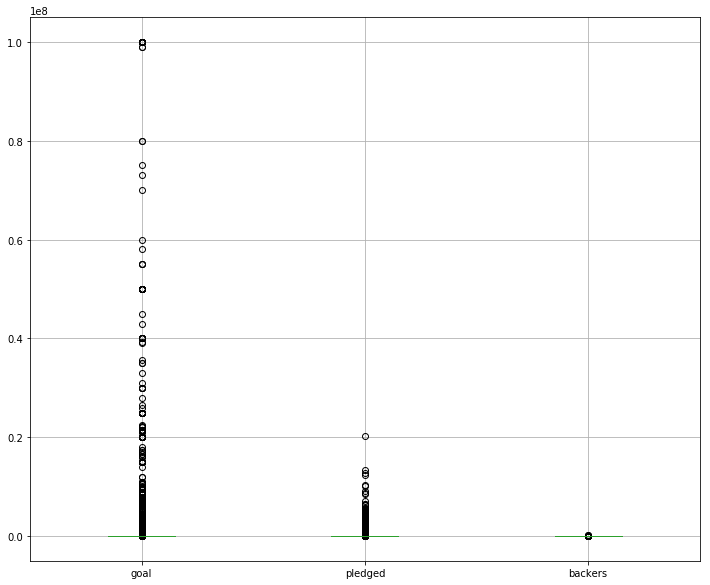

In [136]:
# Boxplot of the dataset
kickstarter_boxplot = kickstarter_clean.boxplot(column = ['goal','pledged','backers'])

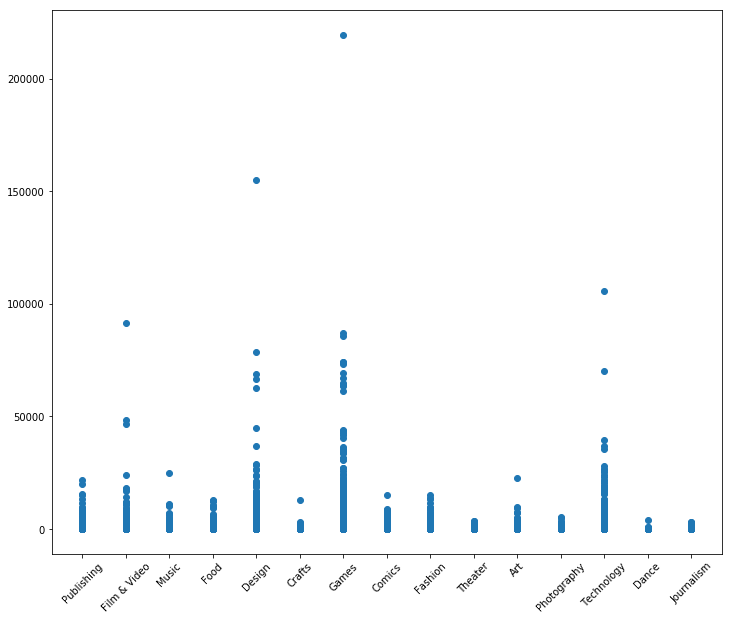

In [54]:
# Scatter plot of main_category vs # of backers
plt.scatter(x='main_category', y = 'backers', data = kickstarter_clean)
plt.xticks(rotation=45)
plt.show()

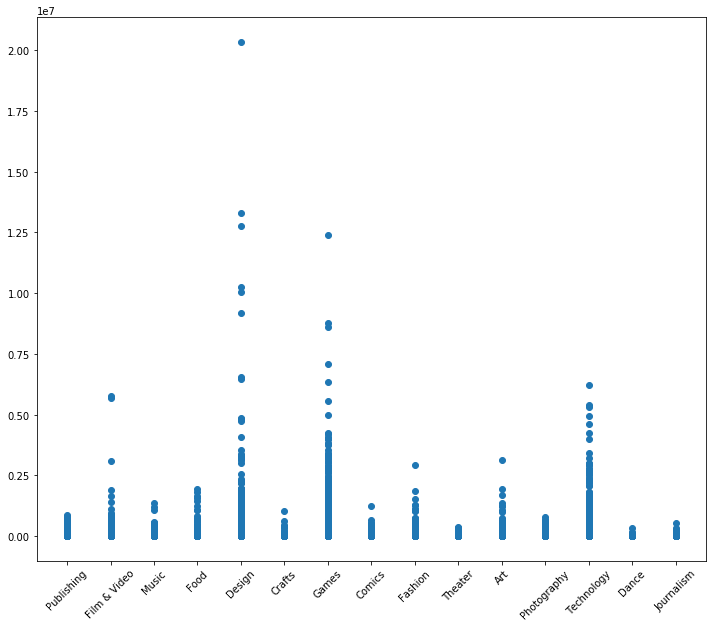

In [55]:
# Scatter plot of main_category vs # of backers
plt.scatter(x='main_category', y = 'pledged', data = kickstarter_clean)
plt.xticks(rotation=45)
plt.show()

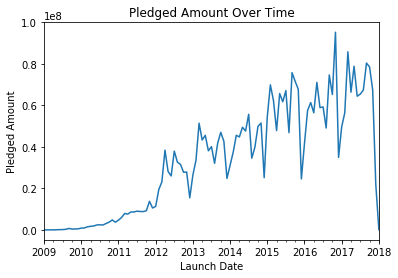

In [20]:
kickstarter2 = kickstarter_clean
kickstarter2.index = kickstarter2['launched']
ax= kickstarter2['pledged'].resample('M').sum().plot(title = 'Pledged Amount Over Time')
ax.set_xlim([datetime.date(2009, 1, 1), datetime.date(2018, 1, 31)])
plt.ylabel('Pledged Amount')
plt.xlabel('Launch Date')
plt.show()

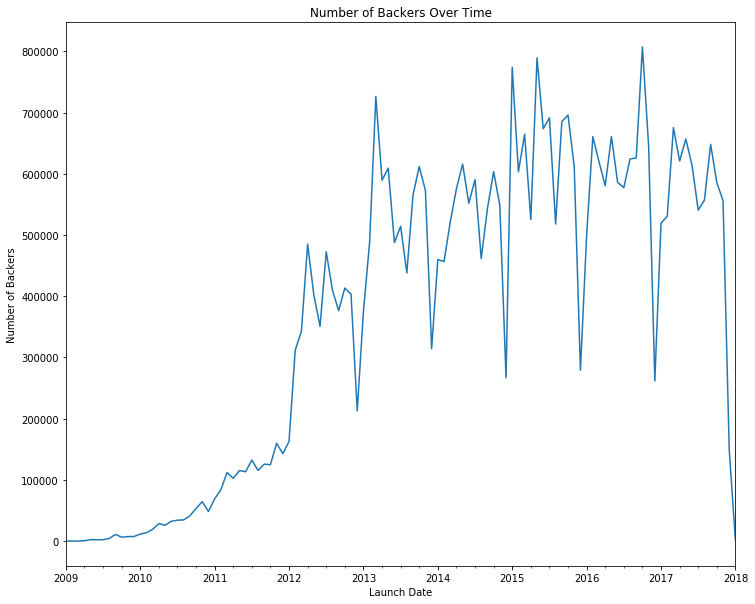

In [80]:
ay= kickstarter2['backers'].resample('M').sum().plot(title = 'Number of Backers Over Time')
ay.set_xlim([datetime.date(2009, 1, 1), datetime.date(2018, 1, 31)])
plt.ylabel('Number of Backers')
plt.xlabel('Launch Date')
plt.show()

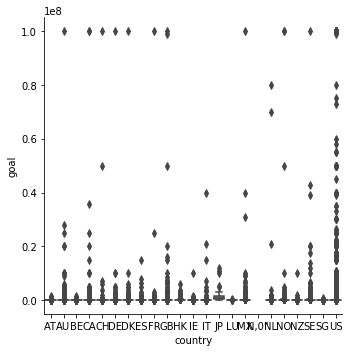

In [137]:
sns.catplot(x="country", y="goal", kind="box", data=kickstarter_clean)

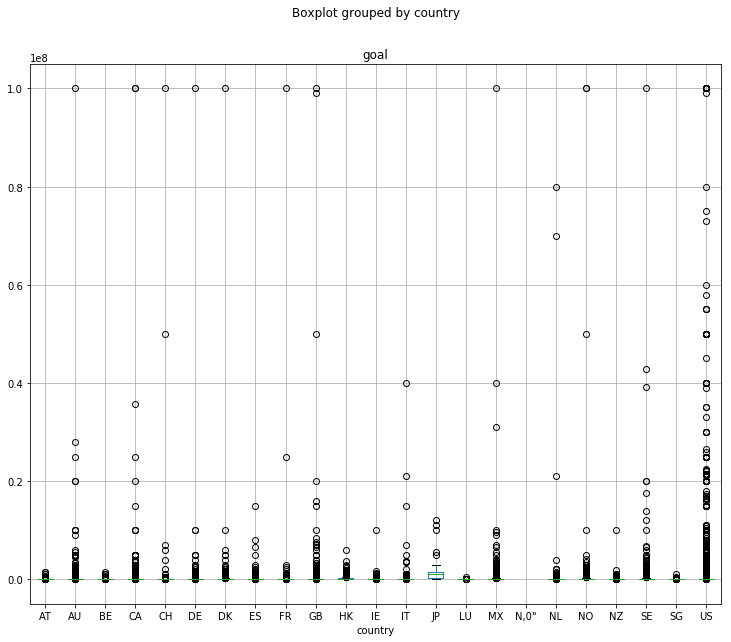

In [139]:
#boxplot of goal per country
kickstarter_clean.boxplot(column='goal', by='country')
plt.show()

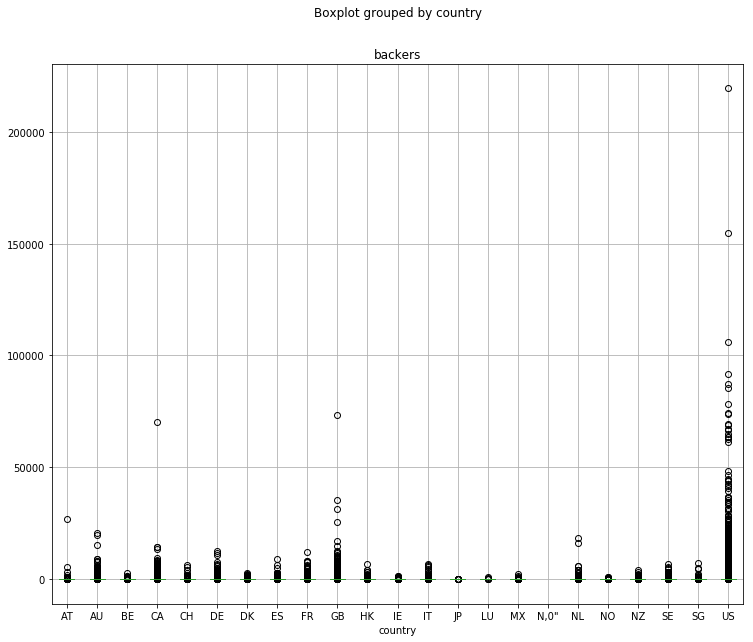

In [140]:
#boxplot of #of backers by country
kickstarter_clean.boxplot(column='backers', by='country')
plt.show()

C:\Users\yunin\Anaconda2\envs\Python 3.6\lib\site-packages\numpy\lib\histograms.py:746: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\yunin\Anaconda2\envs\Python 3.6\lib\site-packages\numpy\lib\histograms.py:747: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


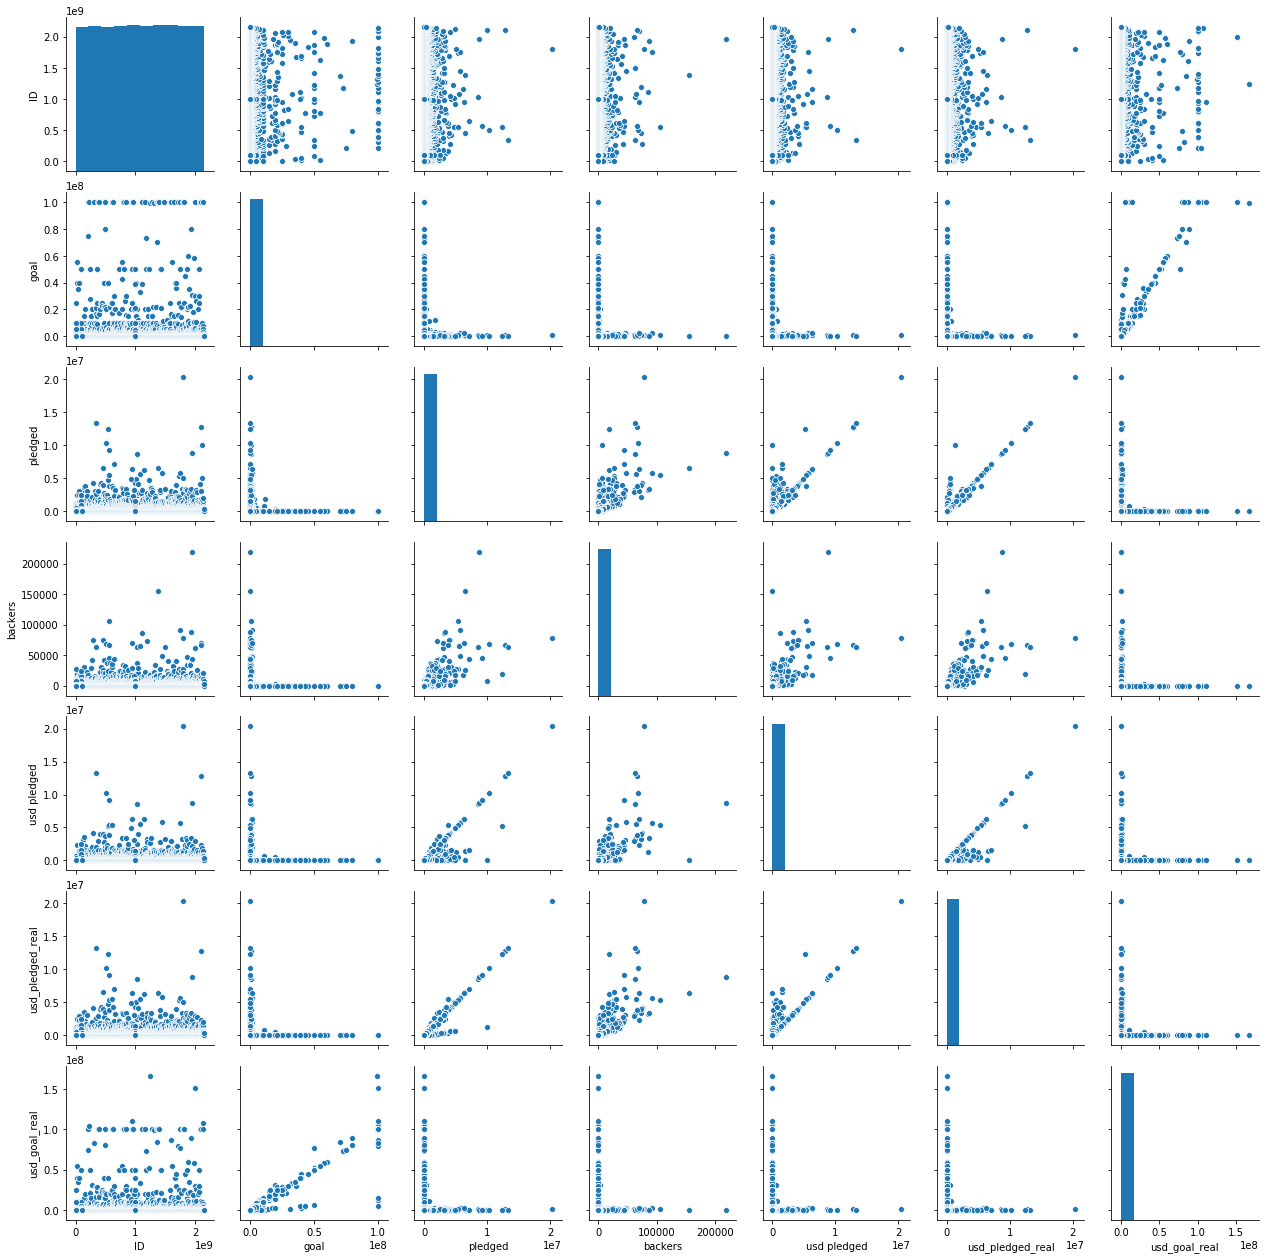

In [46]:
# Pair plot of each column
sns.pairplot(kickstarter_raw)

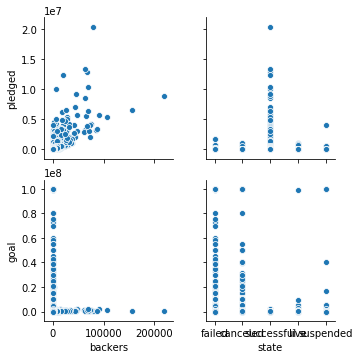

In [45]:
g = sns.pairplot(kickstarter_clean,
                  x_vars=["backers", "state"],
                  y_vars=["pledged", "goal"])

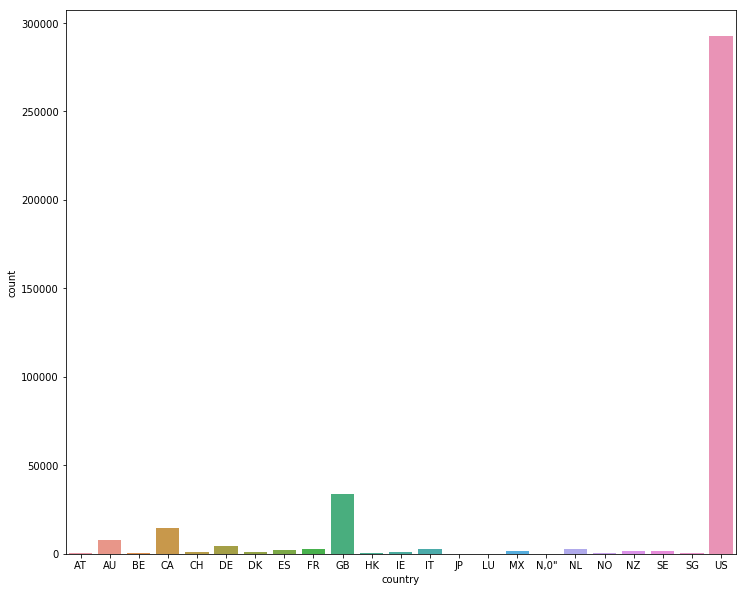

In [142]:
ab= sns.countplot(x='country',data=kickstarter_clean)
plt.show()

In [ ]:
gh = sns.lineplot(x="", y="signal", hue="event",
                data=fmri)

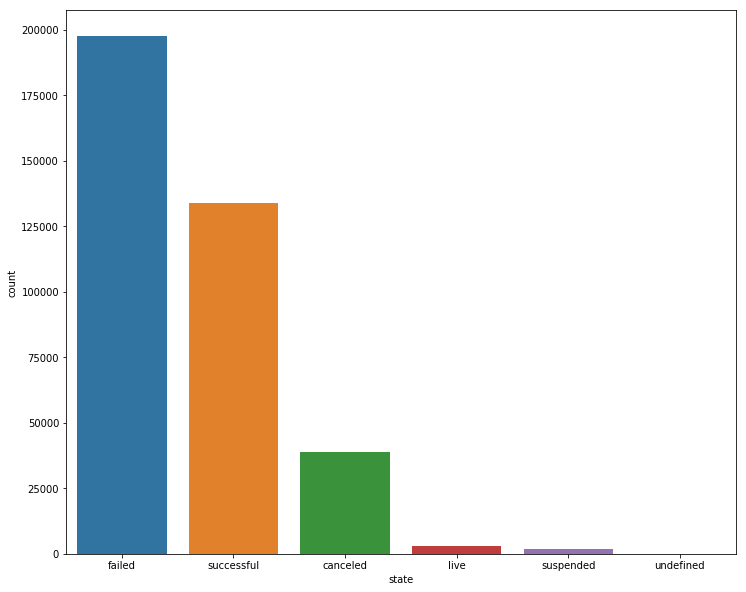

In [24]:
# Count the number of different project states
ac = sns.countplot(x='state', data = kickstarter_clean, order = kickstarter_clean['state'].value_counts().index)

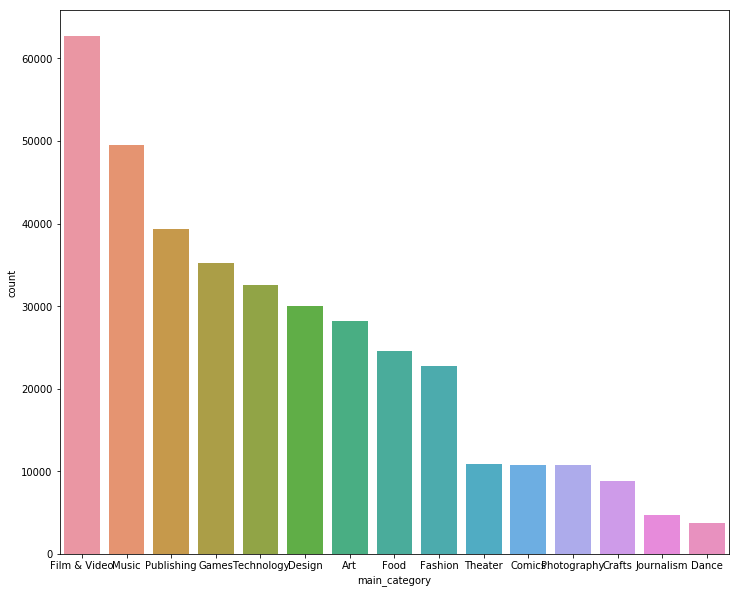

In [23]:
ac = sns.countplot(x='main_category', data = kickstarter_clean, order = kickstarter_clean['main_category'].value_counts().index)

[(0, 800)]

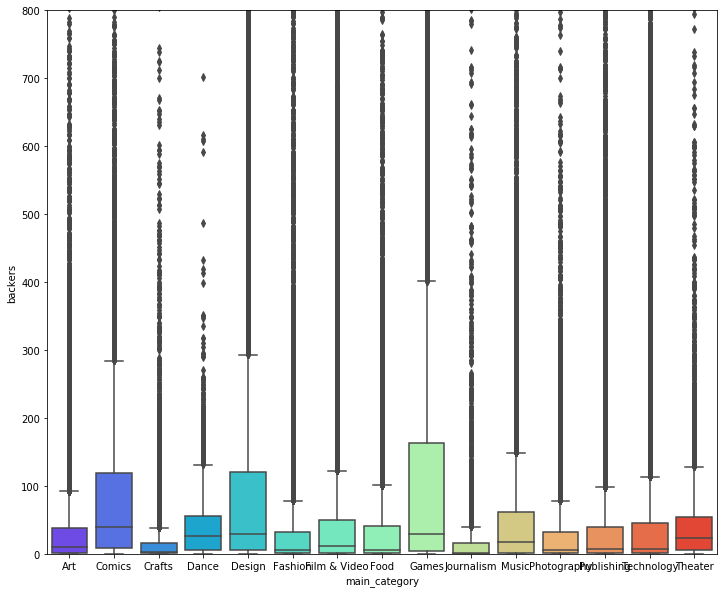

In [144]:
am= sns.boxplot(x='main_category',y='backers',data=kickstarter_clean, palette = 'rainbow')
am.set(ylim=(0,800))


[(0, 2000)]

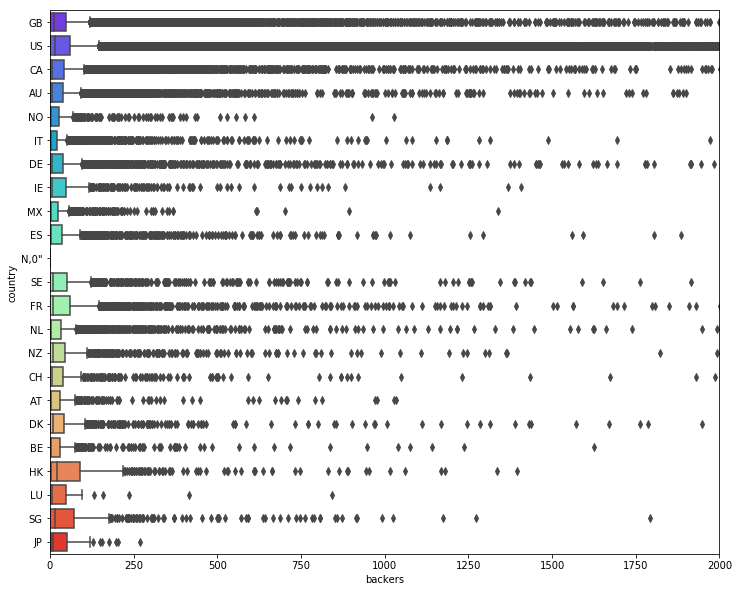

In [79]:
am= sns.boxplot(x='backers',y='country', data=kickstarter_raw, palette = 'rainbow', orient='h')
am.set(xlim=(0,2000))


C:\Users\yunin\Anaconda2\envs\Python 3.6\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


[(-300, 300)]

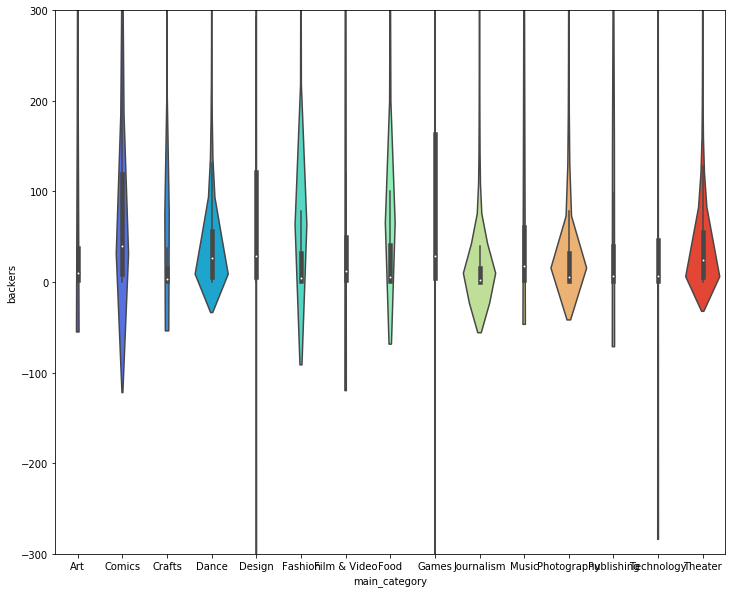

In [145]:
ak= sns.violinplot(x="main_category", y="backers", data=kickstarter_clean,palette='rainbow')
ak.set(ylim =(-300,300))

In [152]:
# check to see if anymore missing values
assert kickstarter_clean.name.notnull().all()


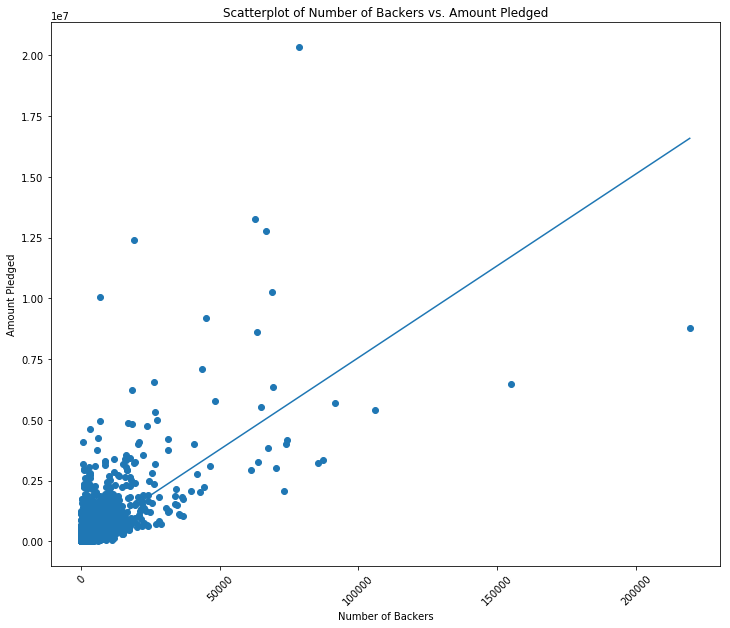

In [47]:
plt.scatter(x='backers', y = 'pledged', data = kickstarter_clean)
plt.xticks(rotation=45)
slope, intercept = np.polyfit(kickstarter_clean.backers, kickstarter_clean.pledged, 1)

x = np.array([0, max(kickstarter_clean.backers)])
y = slope * x + intercept

plt.plot(x, y)

plt.xlabel('Number of Backers')
plt.ylabel('Amount Pledged')
plt.title('Scatterplot of Number of Backers vs. Amount Pledged')

plt.show()

In [24]:
# Find correlation between two numerical variables pledged and backers.
pledged_amount = kickstarter2['pledged']
backers = kickstarter2['backers']
# Calculate the Pearson Correlation Coefficient and its p-value
statistics_result = scipy.stats.pearsonr(pledged_amount, backers)
print('The Pearson Correlation Coefficient is: ', statistics_result[0])
print('The p-value is: ', statistics_result[1])


The Pearson Correlation Coefficient is:  0.7178584514187824
The p-value is:  0.0


In [37]:
#import required module
from scipy.stats import chi2_contingency

# define a function to calculate the Chi-square statistics
def chisq_of_df_cols(df, c1, c2):
    groupsizes = df.groupby([c1, c2]).size()
    ctsum = groupsizes.unstack(c1)
    # fillna(0) is necessary to remove any NAs which will cause exceptions
    return(chi2_contingency(ctsum.fillna(0)))
# apply function to state and main_category
chisq_result = chisq_of_df_cols(kickstarter2, 'state', 'main_category')
print('Chi-Square Test value: ', chisq_result[0])
print('p-value: ', chisq_result[1])
print('Degree of Freedom: ', chisq_result[2])

Chi-Square Test value:  21526.469859728186
p-value:  0.0
Degree of Freedom:  56


In [49]:
# apply function to state and country
chisq_result1 = chisq_of_df_cols(kickstarter2, 'state', 'country')
np.set_printoptions(suppress=True)
print('Chi-Square Test value: ', chisq_result1[0])
print('p-value: ', chisq_result1[1])
print('Degree of Freedom: ', chisq_result1[2])
print('Expected frequencies: ', chisq_result1[3])


Chi-Square Test value:  5089.318159226757
p-value:  0.0
Degree of Freedom:  84
Expected frequencies:  [[    61.7241877     314.7142053       4.4560796     213.17037561
       2.93515179]
 [   810.47890679   4132.40310783     58.51123619   2799.06628875
      38.54046044]
 [    63.79199968    325.25739476      4.605362      220.31176172
       3.03348183]
 [  1525.63168116   7778.76518167    110.14055381   5268.91467748
      72.54790588]
 [    78.68024596    401.16835885      5.68019527    271.72974177
       3.74145814]
 [   431.24218908   2198.78216134     31.13284426   1489.3360748
      20.50673051]
 [   115.07373686    586.7284933       8.30756549    397.41813744
       5.4720669 ]
 [   235.31700368   1199.81496025     16.98833698    812.68974017
      11.18995892]
 [   303.86497092   1549.32169076     21.9370485    1049.42668996
      14.44959985]
 [  3481.26486422  17749.986611      251.32438244  12022.88059809
     165.54354426]
 [    63.89539028    325.78455423      4.61282612

In [50]:
# apply funcution to main_category and contry
chisq_result2 = chisq_of_df_cols(kickstarter2, 'main_category', 'country')
np.set_printoptions(suppress=True)
print('Chi-Square Test value: ', chisq_result2[0])
print('p-value: ', chisq_result2[1])
print('Degree of Freedom: ', chisq_result2[2])
print('Expected frequencies: ', chisq_result2[3])

Chi-Square Test value:  15970.109196543337
p-value:  0.0
Degree of Freedom:  294
Expected frequencies:  [[   44.8347223     17.23028064    14.02916556     5.99930374
     47.8829483     36.3302673     99.84930908    39.17623379
     56.09914368     7.57119458    78.88120898    17.16498426
     62.71478152    51.85806434    17.37839193]
 [  588.70919277   226.24484074   184.21210852    78.77477725
    628.73439151   477.04014299  1311.08665635   514.40954223
    736.6184042     99.41473083  1035.76180441   225.38745665
    823.48605079   680.93026196   228.1896388 ]
 [   46.33672304    17.80750947    14.49915435     6.20028544
     49.48706717    37.54736168   103.19434456    40.48867044
     57.97851198     7.82483594    81.52379555    17.74002561
     64.81577922    53.59535293    17.96058262]
 [ 1108.1761511    425.87943232   346.75773355   148.28429814
   1183.51890306   897.97223497  2467.96717708   968.31575522
   1386.59792989   187.136595    1949.70036814   424.26550712
   1550.

In [51]:
# apply function to state and currency
chisq_result3 = chisq_of_df_cols(kickstarter2, 'state', 'currency')
np.set_printoptions(suppress=True)
print('Chi-Square Test value: ', chisq_result3[0])
print('p-value: ', chisq_result3[1])
print('Degree of Freedom: ', chisq_result3[2])
print('Expected frequencies: ', chisq_result3[3])

Chi-Square Test value:  4849.285036287392
p-value:  0.0
Degree of Freedom:  52
Expected frequencies:  [[   810.47890679   4132.40310783     58.51123619   2799.06628875
      38.54046044]
 [  1525.63168116   7778.76518167    110.14055381   5268.91467748
      72.54790588]
 [    78.68024596    401.16835885      5.68019527    271.72974177
       3.74145814]
 [   115.07373686    586.7284933       8.30756549    397.41813744
       5.4720669 ]
 [  1780.28272688   9077.15896335    128.52468121   6148.37637785
      84.65725071]
 [  3481.26486422  17749.986611      251.32438244  12022.88059809
     165.54354426]
 [    63.89539028    325.78455423      4.61282612    220.66883103
       3.03839834]
 [     4.13562397     21.08637891      0.2985648      14.28277223
       0.19666009]
 [   181.14032972    923.58339647     13.07713813    625.58542389
       8.61371179]
 [    73.2005442     373.22890679      5.28459692    252.80506856
       3.48088353]
 [   149.60619698    762.79975724     10.8005815